# Analisis Airbnb di Bangkok

Analisis ini ditujukan untuk membantu calon host atau investor memahami dinamika pasar Airbnb di Bangkok, termasuk lokasi populer, harga optimal, dan tipe kamar yang paling diminati.

## Batasan Analisa

Analisis ini akan mencakup **seluruh tipe properti** (Entire home/apt, Private room, Shared room) untuk memahami keseluruhan pasar. Namun, dalam rekomendasi akhir, akan ada fokus khusus pada **Entire home/apt**, karena tipe ini paling relevan bagi investor jangka panjang.



### Pertanyaan Kunci

> **Bagaimana calon host/investor dapat memaksimalkan peluang profit listing Airbnb di Bangkok berdasarkan karakteristik listing yang tersedia?**

## Tujuan Proyek
- Mengidentifikasi lokasi strategis untuk listing Airbnb.
- Menentukan harga optimal berdasarkan tipe kamar dan lokasi.
- Memberikan rekomendasi bagi calon host di Bangkok.

## Pertanyaan Penelitian
1. Apa tipe kamar yang paling populer?
2. Di lokasi mana harga listing paling tinggi dan paling rendah?
3. Apa karakteristik listing dengan performa terbaik (harga, review, lokasi)?
4. Bagaimana pola distribusi harga dan ketersediaan kamar?


## Pengenalan Data
Kita menggunakan dataset publik dari Airbnb yang mencakup informasi listing di Bangkok, termasuk harga, tipe kamar, lokasi, dan jumlah review.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load dataset
path = 'Airbnb Listings Bangkok.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


## Pembersihan Data

Tahap ini bertujuan untuk membersihkan dan mempersiapkan dataset agar layak dianalisis. Beberapa langkah utama yang akan dilakukan meliputi:

- Menampilkan informasi umum mengenai dataset
- Mengidentifikasi kolom yang memiliki nilai kosong (missing values)
- Meninjau duplikasi atau anomali data
- Menghapus atau mengubah nilai-nilai yang tidak relevan
- Menyesuaikan format data jika diperlukan

In [3]:
# Mengecek dimensi dataset
print(f"Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.\n")

# Informasi umum dataset
df.info()

Dataset memiliki 15854 baris dan 17 kolom.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  i

In [4]:
# Melihat statistik deskriptif untuk kolom numerik
df.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


In [5]:
# Mengecek jumlah missing values di setiap kolom
print("\nJumlah missing values per kolom:")
print(df.isnull().sum().sort_values(ascending=False))


Jumlah missing values per kolom:
reviews_per_month                 5790
last_review                       5790
name                                 8
host_name                            1
Unnamed: 0                           0
neighbourhood                        0
latitude                             0
id                                   0
host_id                              0
room_type                            0
longitude                            0
minimum_nights                       0
price                                0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64


## Interpretasi Awal Dataset

Setelah memuat dan mengeksplorasi struktur awal data, berikut adalah beberapa temuan penting yang perlu diperhatikan sebelum melanjutkan ke tahap pembersihan:

### 1. Ukuran Dataset
Dataset memiliki **15.854 baris** dan **17 kolom**, yang merupakan ukuran cukup besar untuk eksplorasi dan pemodelan dasar. Tidak ada data duplikat yang jelas pada tahap ini.

### 2. Kolom dengan Nilai Kosong (Missing Values)
Beberapa kolom memiliki missing values yang signifikan:
- `reviews_per_month` dan `last_review` masing-masing memiliki **5.790 nilai kosong**. Hal ini bisa terjadi karena properti tersebut belum pernah menerima review.
- `name` dan `host_name` juga memiliki missing, namun jumlahnya sangat kecil (8 dan 1 baris), dan tidak krusial secara analitik.

### 3. Kolom Tidak Relevan untuk Analisis
Beberapa kolom tampak bersifat administratif dan tidak akan digunakan dalam analisis eksploratif:
- `Unnamed: 0`: kemungkinan besar adalah index otomatis dari export CSV.
- `id`, `host_id`: digunakan sebagai identifier, tidak diperlukan dalam analisis statistik atau visualisasi.

### 4. Anomali Nilai Numerik (Outliers)
- Kolom `price` memiliki nilai maksimum **1.100.000**, jauh di atas nilai rata-rata (~3.217) dan median (~1.490). Ini kemungkinan besar merupakan **outlier ekstrem**.
- `minimum_nights` juga memiliki nilai maksimum **1125 malam**, yang secara realistis tidak umum untuk penyewaan jangka pendek dan kemungkinan perlu difilter.


Langkah selanjutnya adalah membersihkan data berdasarkan temuan ini agar analisis berikutnya lebih akurat dan representatif.

---

Berdasarkan eksplorasi awal, berikut langkah-langkah pembersihan data yang akan dilakukan:

1. **Menghapus kolom yang tidak diperlukan**: `Unnamed: 0`, `id`, `host_id`.
2. **Menangani missing values**:
   - Kolom `reviews_per_month` dan `last_review`: akan diisi dengan `0` dan `NaN` jika tidak pernah menerima review.
3. **Menangani outlier**:
   - Menyaring listing dengan harga yang tidak masuk akal (misalnya, > 10,000 THB per malam).
   - Menyaring listing dengan `minimum_nights` yang sangat tinggi (> 365 hari).
4. **Memastikan format data benar**:
   - Konversi `last_review` menjadi format datetime.

In [10]:
# 1. Menghapus kolom yang tidak akan digunakan dalam analisis
df.drop(columns=['Unnamed: 0', 'id', 'host_id'], inplace=True)

# 2. Menangani missing values
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')  # biarkan NaN untuk yang kosong

# 3. Menyaring outlier
df = df[df['price'] <= 10000]  # buang listing dengan harga sangat tinggi (outlier)
df = df[df['minimum_nights'] <= 365]  # buang listing dengan syarat menginap > 1 tahun

# Konfirmasi dimensi setelah cleaning
print(f"Setelah pembersihan, data memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.")

Setelah pembersihan, data memiliki 15468 baris dan 14 kolom.


## Pemeriksaan Nilai Kategori dan Duplikasi

Setelah dilakukan proses pembersihan utama (cleaning), langkah selanjutnya adalah melakukan **pemeriksaan akhir** terhadap integritas dan konsistensi data. Tujuan dari tahap ini adalah untuk:

- Memastikan tidak ada **baris duplikat** yang dapat memengaruhi hasil analisis.
- Meninjau **nilai unik dari kolom kategorikal** seperti `room_type` dan `neighbourhood`, untuk menghindari kesalahan input seperti penulisan ganda, typo, atau nilai tidak terduga.
- Melihat distribusi data setelah proses cleaning untuk memastikan **data tetap representatif dan tidak bias** akibat proses penyaringan atau penghapusan.

Langkah ini sangat penting untuk menjamin kualitas dan keandalan hasil analisis pada tahap berikutnya.


In [11]:
# 1. Cek duplikasi
duplicate_rows = df.duplicated()
print(f"Jumlah baris duplikat: {duplicate_rows.sum()}")

# 2. Cek nilai unik kolom kategorikal
print("\nNilai unik pada kolom 'room_type':")
print(df['room_type'].value_counts())

print("\nJumlah nilai unik dan 5 teratas pada kolom 'neighbourhood':")
print(f"Jumlah unik: {df['neighbourhood'].nunique()}")
print(df['neighbourhood'].value_counts().head())

Jumlah baris duplikat: 7

Nilai unik pada kolom 'room_type':
room_type
Entire home/apt    8703
Private room       5612
Hotel room          636
Shared room         517
Name: count, dtype: int64

Jumlah nilai unik dan 5 teratas pada kolom 'neighbourhood':
Jumlah unik: 50
neighbourhood
Vadhana        2073
Khlong Toei    2035
Ratchathewi    1105
Huai Khwang    1099
Bang Rak        802
Name: count, dtype: int64


## Interpretasi Pemeriksaan Akhir Data

### 1. Duplikasi
Terdapat **7 baris duplikat** dalam dataset. Ini perlu dihapus karena dapat memengaruhi analisis distribusi, statistik deskriptif, maupun visualisasi.

### 2. Kolom `room_type`
Terdapat **4 jenis akomodasi**:
- Entire home/apt: 8.703 listing
- Private room: 5.612 listing
- Hotel room: 636 listing
- Shared room: 517 listing

Distribusi ini menunjukkan bahwa mayoritas listing adalah tipe **Entire home/apt**, yang sesuai dengan fokus kita pada calon investor profesional.

### 3. Kolom `neighbourhood`
Terdapat **50 nilai unik**, dengan beberapa area paling populer:
- Vadhana, Khlong Toei, dan Ratchathewi muncul sebagai **wilayah dengan jumlah listing tertinggi**.
- Distribusi ini penting untuk analisis lokasi potensial dengan demand tinggi.

Setelah duplikasi dihapus dan struktur data dipastikan konsisten, dataset kini siap digunakan untuk tahap berikutnya: **Eksplorasi Data dan Analisis Visualisasi.**


In [12]:
# Menghapus baris duplikat
df = df.drop_duplicates()
print(f"Jumlah baris setelah menghapus duplikat: {df.shape[0]}")

Jumlah baris setelah menghapus duplikat: 15461


## Exploratory Data Analysis (EDA) And Visualization

### Distribusi Jumlah Listing per Host

Salah satu indikator penting dalam menganalisis dinamika pasar Airbnb adalah memahami bagaimana properti tersebar di antara para host. Dengan kata lain, apakah mayoritas listing dimiliki oleh individu yang hanya memiliki satu properti, ataukah terdapat host besar yang mengelola puluhan hingga ratusan listing?

Untuk menjawab pertanyaan ini, kita menggunakan variabel `calculated_host_listings_count`, yang menunjukkan jumlah properti yang dimiliki oleh masing-masing host. Histogram berikut memperlihatkan distribusi jumlah listing per host di Bangkok.

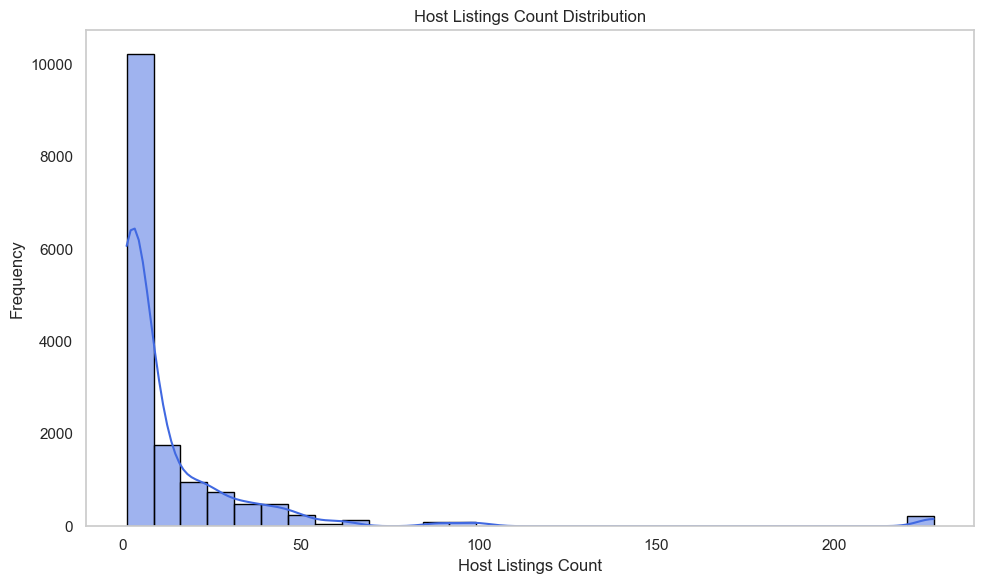

In [13]:
# Hitung jumlah listing per host_name
listing_by_host = df['host_name'].value_counts()


# Atur style visualisasi
sns.set(style='whitegrid')

# Plot histogram distribusi jumlah listing per host
plt.figure(figsize=(10, 6))
sns.histplot(
    df['calculated_host_listings_count'], 
    bins=30, 
    kde=True, 
    color='royalblue', 
    edgecolor='black',
)

plt.title('Host Listings Count Distribution')
plt.xlabel('Host Listings Count')
plt.ylabel('Frequency')
plt.grid(False)
plt.tight_layout()
plt.show()

### Insight

Dari visualisasi yang ditampilkan, kita dapat menarik beberapa kesimpulan penting:

- Mayoritas host di Bangkok memiliki **hanya satu atau dua listing**. Ini menunjukkan bahwa pasar Airbnb di kota ini masih didominasi oleh host individu atau pemilik properti skala kecil.
- Semakin banyak jumlah listing yang dimiliki, semakin sedikit jumlah host yang berada pada kategori tersebut. Kurva distribusi menurun tajam dan memiliki bentuk yang **right-skewed**.
- Meski sedikit, terdapat host yang memiliki **lebih dari 100 listing**, yang kemungkinan besar merupakan perusahaan manajemen properti atau investor besar.

Distribusi ini penting untuk dipahami oleh calon investor, karena dapat menggambarkan tingkat persaingan serta potensi strategi masuk ke pasar — apakah ingin bersaing sebagai host individu atau bermain dalam skala yang lebih besar.

---

### Analisis Distribusi Harga Sewa (price)

Harga sewa per malam adalah salah satu faktor paling krusial bagi calon host/investor. Melalui visualisasi distribusi `price`, kita dapat:

- Mengidentifikasi rentang harga paling umum di pasar Bangkok.
- Menilai apakah distribusi harga normal atau condong (skewed).
- Mendeteksi outlier tambahan setelah proses cleaning awal.

Visualisasi ini membantu dalam menyusun **strategi pricing** yang kompetitif.

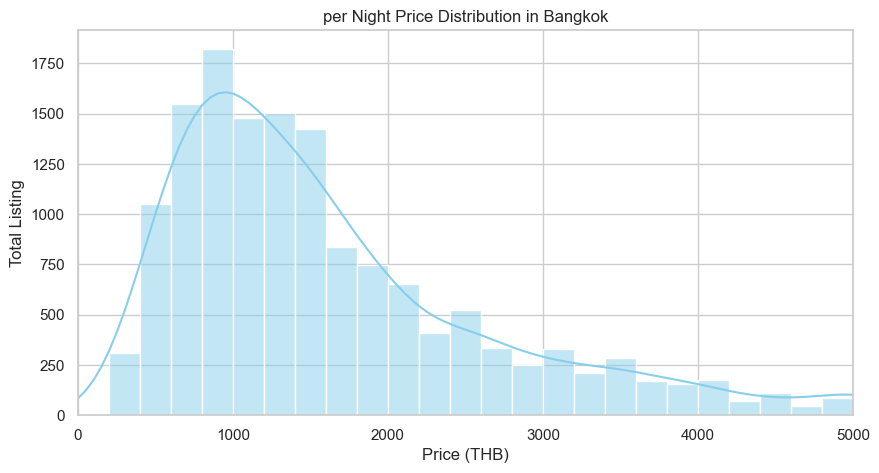

In [14]:
# Set style visualisasi
sns.set(style="whitegrid")

# Visualisasi distribusi harga
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title('per Night Price Distribution in Bangkok')
plt.xlabel('Price (THB)')
plt.ylabel('Total Listing')
plt.xlim(0, 5000)  # batas visual agar tidak terdominasi oleh outlier
plt.show()


### Insight: Distribusi Harga Sewa per Malam

- Distribusi harga listing Airbnb di Bangkok **cenderung miring ke kanan (right-skewed)**.
- Sebagian besar listing berada di rentang harga **1000 – 2.000 THB per malam**, yang merupakan kisaran kompetitif dan umum di pasar.
- Meskipun sudah dibersihkan dari outlier ekstrem, masih terdapat beberapa listing dengan harga di atas **3.000 – 5.000 THB**, namun jumlahnya relatif sedikit.
- Kurva KDE (Kernel Density Estimate) menunjukkan **puncak tertinggi (mode)** berada di kisaran **1.000–1.500 THB**.

**Kesimpulan awal**: Bagi calon host/investor, berada di kisaran harga pasar ini kemungkinan besar akan meningkatkan kompetisi listing Anda di area Bangkok.

---


### Analisis Berdasarkan Lokasi (`neighbourhood`)

Lokasi adalah faktor penentu utama dalam keberhasilan listing Airbnb. Dalam konteks pasar Bangkok, setiap distrik (neighbourhood) memiliki karakteristik dan permintaan yang berbeda.

Analisis ini bertujuan untuk:
- Menemukan wilayah dengan **jumlah listing terbanyak** (indikator kompetisi dan popularitas).
- Mengidentifikasi **neighbourhood dengan harga rata-rata tertinggi** (indikator potensi profit).
- Mengidentifikasi **neighbourhood dengan rata-rata rating tertinggi** (indikator banyaknya demand)


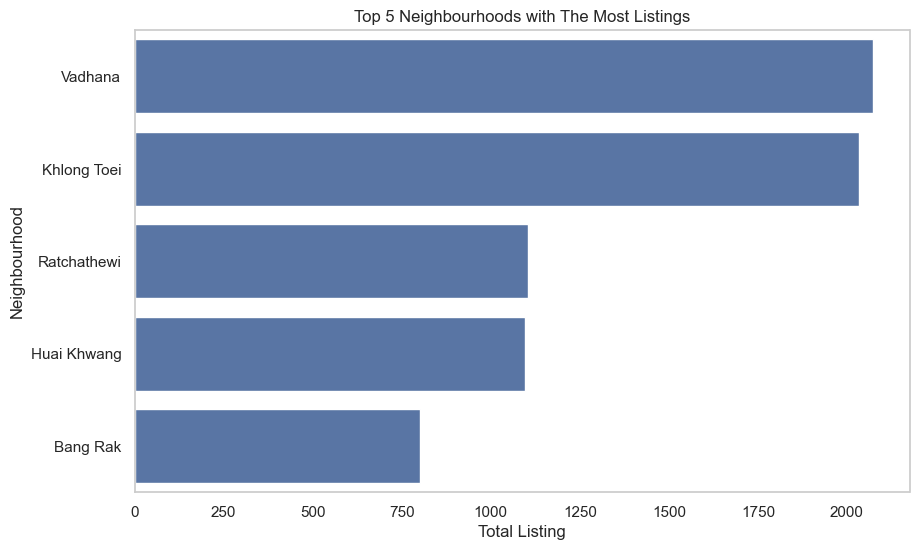

In [17]:
top_n = 5  # ambil 5 lokasi teratas

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='neighbourhood', order=df['neighbourhood'].value_counts().head(top_n).index)
plt.title(f'Top {top_n} Neighbourhoods with The Most Listings')
plt.xlabel('Total Listing')
plt.ylabel('Neighbourhood')
plt.grid(False)
plt.show()

### Top 5 Neighborhoods with The Most Listings

Grafik ini menunjukkan lima kawasan di Bangkok dengan jumlah listing Airbnb terbanyak.

- **Vadhana** dan **Khlong Toei** mendominasi, masing-masing dengan lebih dari 1900 listing.
- **Ratchathewi**, **Huai Khwang**, dan **Bang Rak** berada di posisi selanjutnya, namun jumlah listing-nya jauh lebih sedikit dibanding dua besar.

**Interpretasi:**
Wattana dan Khlong Toei kemungkinan besar merupakan kawasan strategis — dekat pusat kota, transportasi umum, atau destinasi wisata populer. Dominasi ini menjadikan mereka pilihan utama bagi calon host baru untuk membuka listing baru.

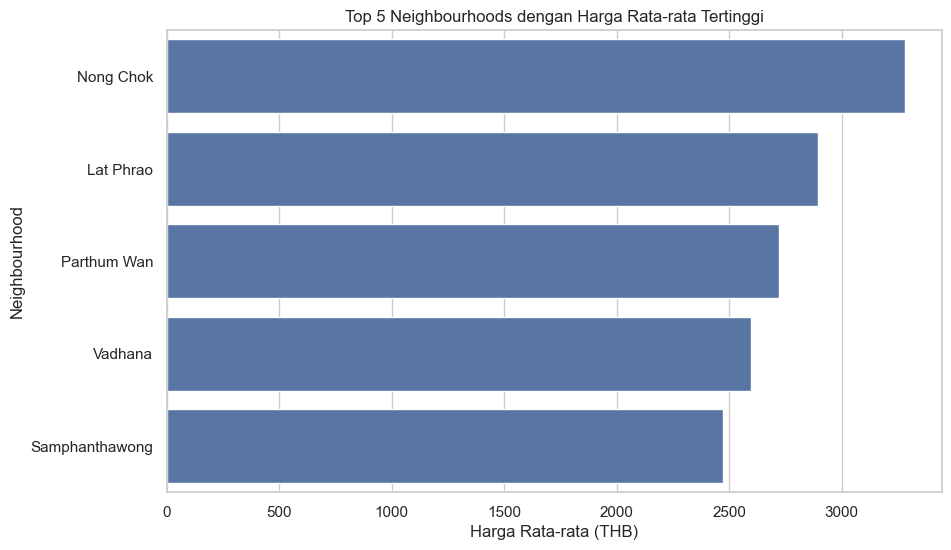

In [16]:
# Hitung rata-rata harga per lokasi
price_per_area = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=price_per_area.values, y=price_per_area.index)
plt.title(f'Top {top_n} Neighbourhoods dengan Harga Rata-rata Tertinggi')
plt.xlabel('Harga Rata-rata (THB)')
plt.ylabel('Neighbourhood')
plt.show()

### Top 5 Neighborhoods dengan Harga Rata-rata Tertinggi

Grafik ini menunjukkan area dengan **harga rata-rata per malam tertinggi**:

- **Nong Chok** menjadi yang paling mahal, diikuti oleh **Lat Phrao**, **Pathum Wan**, **Vadhana**, dan **Samphanthawong**.
- Harga rata-rata bisa mencapai lebih dari 3000 THB per malam.

**Interpretasi:**
Harga tinggi belum tentu mencerminkan popularitas. Nong Chok, misalnya, muncul sebagai kawasan termahal namun tidak termasuk dalam daftar dengan jumlah listing terbanyak. Ini menunjukkan adanya listing eksklusif seperti villa mewah atau properti khusus di area tersebut.

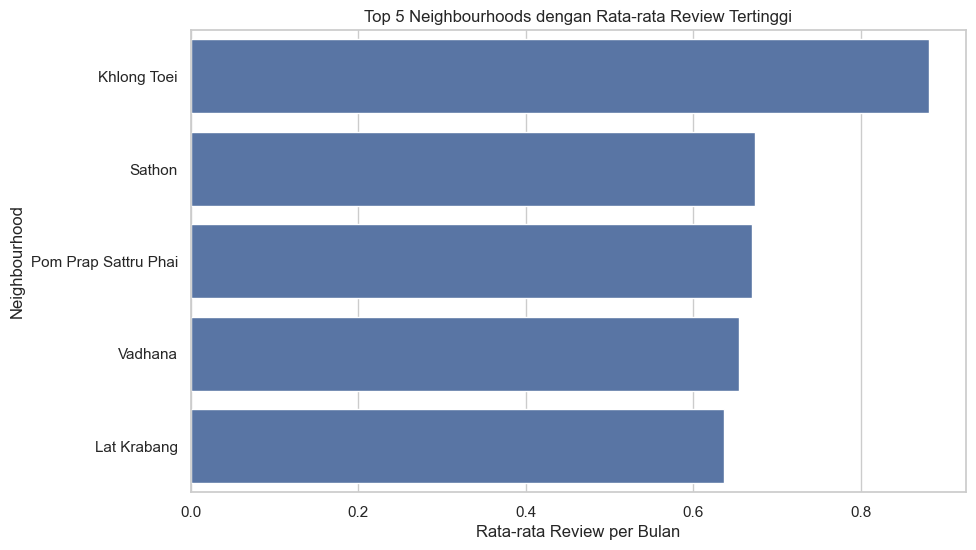

In [18]:
# Membuat Barplot untuk menampilkan neighbourhood dengan rata-rata review tertinggi

# Hitung rata-rata review per lokasi
reviews_per_area = df.groupby('neighbourhood')['reviews_per_month'].mean().sort_values(ascending=False).head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=reviews_per_area.values, y=reviews_per_area.index)
plt.title(f'Top {top_n} Neighbourhoods dengan Rata-rata Review Tertinggi')
plt.xlabel('Rata-rata Review per Bulan')
plt.ylabel('Neighbourhood')
plt.show()

### Top 5 Neighborhoods dengan Rata-rata Review Tertinggi (Per Bulan)

Grafik ini merepresentasikan kawasan dengan **jumlah review rata-rata tertinggi per bulan**, yang mencerminkan tingkat okupansi dan kepuasan tamu.

- **Khlong Toei** kembali muncul sebagai yang tertinggi.
- Diikuti oleh **Sathon**, **Phra Nakhon**, **Vadhana**, dan **Lat Krabang**.

**Interpretasi:**
Khlong Toei tidak hanya populer dalam jumlah listing, tapi juga dalam kualitas interaksi dengan tamu. Rata-rata review yang tinggi menandakan okupansi yang baik dan kepuasan pengguna yang tinggi. **Lat Krabang**, yang dekat bandara, mungkin menarik bagi wisatawan yang transit.

### Kesimpulan Umum:

- **Vadhana** dan **Khlong Toei** adalah kawasan terbaik secara jumlah dan performa listing.
- **Nong Chok** mahal tapi bukan yang paling ramai, cocok untuk listing eksklusif.
- **Khlong Toei** unggul dalam hal review bulanan — indikasi okupansi tinggi.
- **Area strategis + rating tinggi = peluang optimal bagi host baru.**

---

### Hubungan antara Harga dan Jumlah Ulasan per Bulan

Memahami bagaimana harga memengaruhi keterlibatan tamu merupakan langkah penting dalam menentukan strategi penetapan harga yang efektif di Airbnb. Salah satu indikator keterlibatan tamu yang dapat diamati adalah **jumlah ulasan per bulan**, yang mencerminkan seberapa sering sebuah listing dipesan.

Visualisasi berikut menyajikan hubungan antara **harga sewa per malam (dalam THB)** dengan **jumlah ulasan per bulan** untuk listing Airbnb di Bangkok. Melalui scatter plot ini, kita dapat mengamati apakah listing dengan harga lebih tinggi cenderung menerima lebih banyak atau justru lebih sedikit ulasan setiap bulannya.

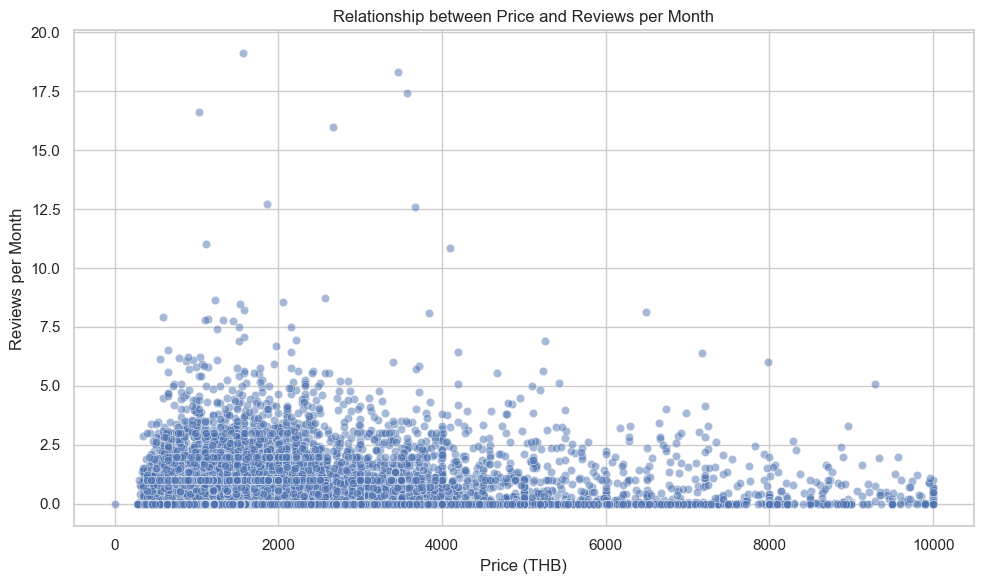

In [27]:
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='reviews_per_month', alpha=0.5)
plt.title('Relationship between Price and Reviews per Month')
plt.xlabel('Price (THB)')
plt.ylabel('Reviews per Month')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Insight

- Listing dengan harga di bawah **2.000 THB** cenderung memiliki **jumlah ulasan per bulan yang lebih tinggi**, yang mengindikasikan frekuensi pemesanan yang lebih besar pada segmen harga menengah ke bawah.
- Semakin tinggi harga listing, **jumlah ulasan per bulan cenderung menurun**, menunjukkan berkurangnya permintaan atau segmentasi pasar yang lebih sempit.
- Terdapat beberapa listing dengan harga tinggi yang tetap memperoleh ulasan rutin, namun kasus ini jarang dan kemungkinan merupakan properti premium dengan nilai unik.
- Pola umum menunjukkan adanya **hubungan negatif** antara harga dan aktivitas pemesanan, khususnya setelah melewati kisaran **3.000–4.000 THB**.

Bagi host atau investor baru, temuan ini menekankan pentingnya menyesuaikan harga dengan tingkat permintaan pasar agar dapat meningkatkan visibilitas dan tingkat hunian.

---

## Fokus Analisis: Khlong Toei dan Vadhana

Berdasarkan hasil eksplorasi sebelumnya, dua kawasan yang menonjol dalam hal jumlah listing dan performa review adalah **Khlong Toei** dan **Vadhana**.

Keduanya memiliki jumlah listing yang tinggi dan juga menempati posisi lima besar dalam rata-rata review per bulan, yang menunjukkan potensi bisnis Airbnb yang kuat di kedua lokasi ini.

Pada bagian ini, kita akan fokus menganalisis lebih dalam mengenai kedua kawasan tersebut, dengan langkah-langkah berikut:

1. Menampilkan **sebaran harga** listing di Khlong Toei dan Vadhana.
2. Mengidentifikasi **tipe kamar yang paling dominan** di masing-masing kawasan.

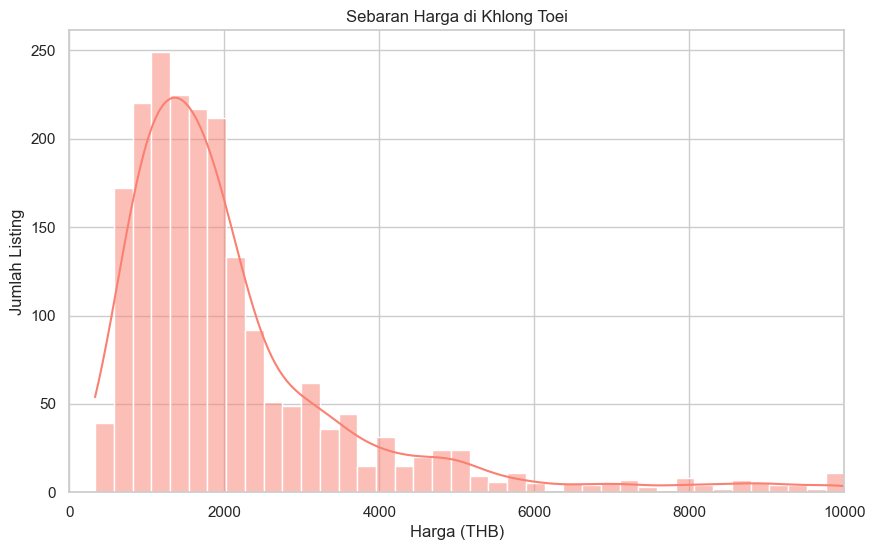

C:\Users\LENOVO LOQ\AppData\Local\Temp\ipykernel_1976\328996615.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




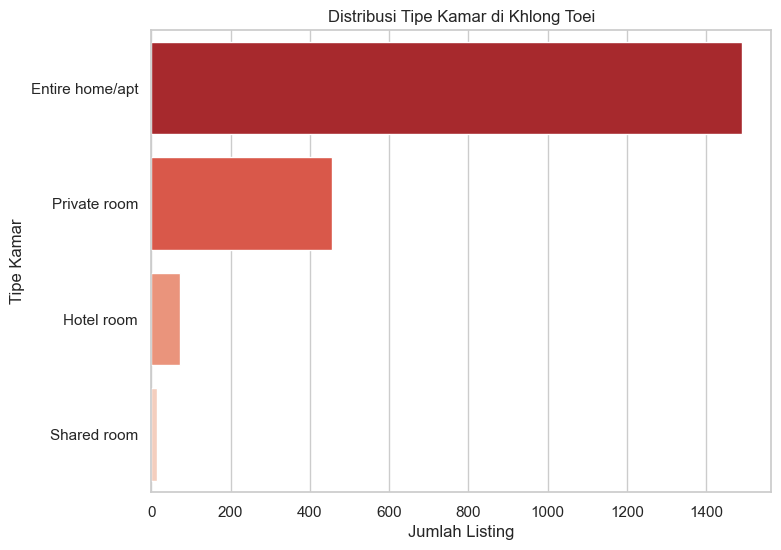

In [25]:
# Filter data untuk Khlong Toei saja
khlong_df = df[df['neighbourhood'] == 'Khlong Toei']

# Visualisasi distribusi harga di Khlong Toei
plt.figure(figsize=(10,6))
sns.histplot(khlong_df['price'], bins=40, kde=True, color='salmon')
plt.title('Sebaran Harga di Khlong Toei')
plt.xlabel('Harga (THB)')
plt.ylabel('Jumlah Listing')
plt.xlim(0, 10000)
plt.show()

# Tipe kamar di Khlong Toei
room_type_khlong = khlong_df['room_type'].value_counts().reset_index()
room_type_khlong.columns = ['room_type', 'count']

# Visualisasi
plt.figure(figsize=(8,6))
sns.barplot(data=room_type_khlong, x='count', y='room_type', palette='Reds_r')
plt.title('Distribusi Tipe Kamar di Khlong Toei')
plt.xlabel('Jumlah Listing')
plt.ylabel('Tipe Kamar')
plt.show()


## Analisis Kawasan Khlong Toei

### Distribusi Harga Listing

Listing di Khlong Toei cenderung memiliki harga yang lebih terjangkau dibanding Vadhana, dengan mayoritas berada di bawah 2500 THB per malam. Ini menjadikan Khlong Toei sebagai pilihan yang menarik bagi wisatawan dengan anggaran menengah ke bawah.

### Tipe Kamar Populer

Sama seperti Vadhana, tipe kamar yang dominan adalah **Entire home/apt**, namun terdapat pula cukup banyak listing dengan tipe **Private room**, menandakan bahwa kawasan ini melayani berbagai segmen pasar.

### Interpretasi

Khlong Toei memiliki karakteristik yang lebih fleksibel dan inklusif. Selain cocok untuk wisatawan keluarga, kawasan ini juga menarik bagi backpacker atau solo traveler yang mencari private room dengan harga terjangkau.

### Rekomendasi

- Listing bertipe **Private room** di Khlong Toei tetap memiliki potensi besar, terutama jika disertai review bagus dan harga kompetitif.
- Host dapat menyasar segmen anggaran menengah dengan harga **1000–2500 THB**.
- Sertakan nilai tambah seperti sarapan, koneksi Wi-Fi cepat, atau tips lokal agar menarik perhatian tamu.


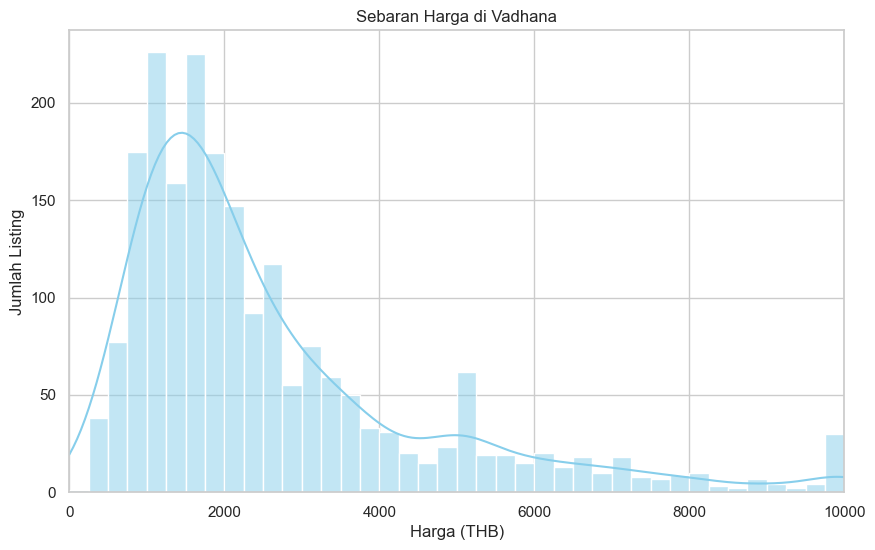

C:\Users\LENOVO LOQ\AppData\Local\Temp\ipykernel_1976\1011862302.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




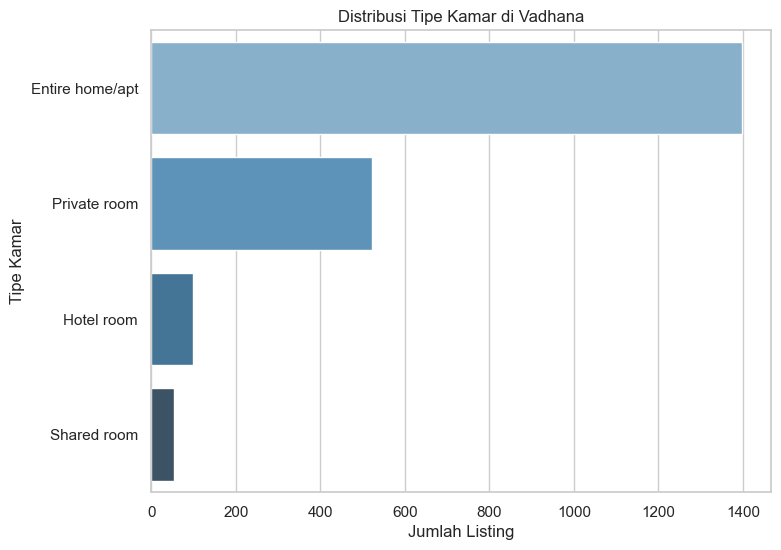

In [24]:
# Filter data untuk Vadhana saja
vadhana_df = df[df['neighbourhood'] == 'Vadhana']

# Visualisasi distribusi harga di Vadhana
plt.figure(figsize=(10,6))
sns.histplot(vadhana_df['price'], bins=40, kde=True, color='skyblue')
plt.title('Sebaran Harga di Vadhana')
plt.xlabel('Harga (THB)')
plt.ylabel('Jumlah Listing')
plt.xlim(0, 10000)
plt.show()

# Tipe kamar di Vadhana
room_type_vadhana = vadhana_df['room_type'].value_counts().reset_index()
room_type_vadhana.columns = ['room_type', 'count']

# Visualisasi
plt.figure(figsize=(8,6))
sns.barplot(data=room_type_vadhana, x='count', y='room_type', palette='Blues_d')
plt.title('Distribusi Tipe Kamar di Vadhana')
plt.xlabel('Jumlah Listing')
plt.ylabel('Tipe Kamar')
plt.show()


## Analisis Kawasan Vadhana

### Distribusi Harga Listing

Kawasan Vadhana memiliki distribusi harga yang cukup lebar, namun sebagian besar listing berada di bawah 3000 THB per malam. Ada beberapa outlier di atas 5000 THB yang kemungkinan besar merupakan properti premium.

### Tipe Kamar Populer

Jenis kamar yang paling umum ditemukan di Vadhana adalah **Entire home/apt**, yang menunjukkan bahwa tamu di kawasan ini lebih menyukai privasi penuh. Tipe ini sangat cocok untuk wisatawan keluarga atau profesional.

### Interpretasi

Vadhana adalah kawasan yang menarik bagi wisatawan yang mencari kenyamanan seperti di rumah sendiri. Dengan dominasi kamar tipe "entire home/apt", kawasan ini cenderung diminati oleh tamu yang menginap lebih dari satu malam atau yang ingin pengalaman lokal tanpa berbagi ruang.

### Rekomendasi

- Host baru sebaiknya mempertimbangkan menyewakan **Entire home/apt** dengan fasilitas lengkap.
- Harga optimal untuk bersaing berada di kisaran **1500–3000 THB**.
- Tingkatkan daya saing dengan foto profesional dan deskripsi properti yang menekankan kenyamanan dan privasi.


## 🗺️ Visualisasi Geospasial
Menampilkan sebaran listing berdasarkan koordinat geografis.

In [26]:
# Visualisasi lokasi listing dengan plotly
fig = px.scatter_mapbox(df, lat='latitude', lon='longitude', color='neighbourhood',
                         mapbox_style='open-street-map', zoom=10,
                         title='Sebaran Listing Airbnb di Bangkok')
fig.show()

C:\Users\LENOVO LOQ\AppData\Local\Temp\ipykernel_1976\3546348222.py:2: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



## Insight dan Rekomendasi

### Insight Utama

1. **Khlong Toei** dan **Vadhana** adalah dua kawasan dengan performa listing yang menonjol:
   - Keduanya memiliki jumlah listing yang tinggi serta berada di posisi atas dalam hal review rata-rata per bulan.
   - Ini menunjukkan bahwa kawasan tersebut tidak hanya populer, tetapi juga memiliki tingkat okupansi yang tinggi.

2. **Distribusi Harga**
   - Di Khlong Toei, harga listing lebih bervariasi dan umumnya lebih terjangkau (banyak listing di bawah 2500 THB).
   - Vadhana memiliki rentang harga yang lebih lebar, dan banyak listing berada di rentang 2000–3500 THB.

3. **Tipe Kamar Dominan**
   - Tipe **Entire home/apt** mendominasi di kedua kawasan, terutama di Vadhana, menunjukkan bahwa tamu cenderung menginginkan privasi penuh.
   - Khlong Toei memiliki variasi tipe kamar lebih luas, termasuk private room yang cukup banyak.


### Rekomendasi Strategis untuk Calon Host/Investor

1. **Prioritaskan Lokasi**
   - Fokuskan investasi di kawasan **Khlong Toei** dan **Vadhana** karena terbukti memiliki volume pasar dan permintaan yang tinggi.
   - Jika ingin menjangkau segmen wisatawan hemat atau solo traveler, Khlong Toei menjadi pilihan menarik.
   - Untuk properti yang menyasar keluarga atau tamu yang menginap lama, Vadhana sangat ideal.

2. **Tipe Properti**
   - Listing bertipe **Entire home/apt** memberikan performa terbaik dari segi permintaan dan harga — cocok untuk investor jangka panjang.
   - Tipe **Private room** di Khlong Toei juga potensial, asalkan didukung dengan layanan dan fasilitas yang baik.

3. **Penetapan Harga**
   - Untuk Khlong Toei: kisaran harga ideal adalah **1000–2500 THB**.
   - Untuk Vadhana: fokus pada kisaran **2000–3500 THB** untuk menghindari persaingan berlebih dan tetap kompetitif.

4. **Optimasi Listing**
   - Gunakan foto profesional, deskripsi properti yang menonjolkan keunggulan lokasi dan fasilitas.
   - Tambahkan nilai tambah seperti Wi-Fi cepat, akses transportasi mudah, atau layanan tambahan (check-in mandiri, tips lokal).

5. **Review dan Responsivitas**
   - Fokus meningkatkan rating dan jumlah review: tanggapi review tamu secara cepat, jaga kualitas layanan, dan pantau kompetitor.

---

### Kesimpulan

Kombinasi lokasi strategis, tipe properti yang sesuai, dan harga kompetitif merupakan kunci keberhasilan dalam pasar Airbnb Bangkok. Dengan pendekatan berbasis data seperti ini, calon host/investor dapat membuat keputusan yang lebih terarah dan minim risiko.
